In [3]:
## link API: https://olinda.bcb.gov.br/olinda/servico/mecir_dinheiro_em_circulacao/versao/v1/aplicacao#!/recursos/informacoes_diarias#eyJmb3JtdWxhcmlvIjp7IiRmb3JtYXQiOiJqc29uIiwiJHRvcCI6MTAwLCIkb3JkZXJieSI6IgQwBCBkZXNjIiwiJHNraXAiOjF9LCJwcm9wcmllZGFkZXMiOlswLDEsMiwzLDRdLCJwZXNxdWlzYWRvIjp0cnVlLCJhY3RpdmVUYWIiOiJ0YWJsZSIsImdyaWRTdGF0ZSI6ewMwAzpbewNCAyIEMAQiLANBA30sewNCAyIEMQQiLANBA30sewNCAyIEMgQiLANBA30sewNCAyIEMwQiLANBA30sewNCAyIENAQiLANBA31dLAMxAzp7fSwDMgM6W10sAzMDOnt9LAM0Azp7fSwDNQM6e319LCJwaXZvdE9wdGlvbnMiOnsDYQM6e30sA2IDOltdLANjAzo1MDAsA2QDOltdLANlAzpbXSwDZgM6W10sA2cDOiJrZXlfYV90b196IiwDaAM6ImtleV9hX3RvX3oiLANpAzp7fSwDagM6e30sA2sDOjg1LANsAzpmYWxzZSwDbQM6e30sA24DOnt9LANvAzoiQ29udGFnZW0iLANwAzoiVGFibGUifX0=
import requests
import pandas as pd

link ='https://olinda.bcb.gov.br/olinda/servico/mecir_dinheiro_em_circulacao/versao/v1/odata/informacoes_diarias?$top=100&$orderby=Data%20desc&$format=json&$select=Data,Quantidade,Valor,Denominacao,Especie'

requisicao = requests.get(link)
informacao = requisicao.json()
print(informacao)

{'@odata.context': 'https://was-p.bcnet.bcb.gov.br/olinda/servico/mecir_dinheiro_em_circulacao/versao/v1/odata$metadata#informacoes_diarias(Data,Quantidade,Valor,Denominacao,Especie)', 'value': [{'Data': '2023-03-10', 'Quantidade': 3191005234, 'Valor': 31910052.34, 'Denominacao': '0.01', 'Especie': 'Moedas'}, {'Data': '2023-03-10', 'Quantidade': 7582936701, 'Valor': 379146835.05, 'Denominacao': '0.05', 'Especie': 'Moedas'}, {'Data': '2023-03-10', 'Quantidade': 7804753346, 'Valor': 780475334.6, 'Denominacao': '0.10', 'Especie': 'Moedas'}, {'Data': '2023-03-10', 'Quantidade': 3472619291, 'Valor': 868154822.75, 'Denominacao': '0.25', 'Especie': 'Moedas'}, {'Data': '2023-03-10', 'Quantidade': 3521443850, 'Valor': 1760721925.0, 'Denominacao': '0.50', 'Especie': 'Moedas'}, {'Data': '2023-03-10', 'Quantidade': 148661444, 'Valor': 148661444.0, 'Denominacao': '1.00', 'Especie': 'Cédulas'}, {'Data': '2023-03-10', 'Quantidade': 4068737122, 'Valor': 4068737122.0, 'Denominacao': '1.00', 'Especie': 

In [2]:
## Requisição da API de 10000 em 10000 mil valores (top=10000) até não vir mais valores (informacao["value"] < 1)
import requests
import pandas as pd


tabela_final =pd.DataFrame()
pular_indice = 0

while True:
    link = f'https://olinda.bcb.gov.br/olinda/servico/mecir_dinheiro_em_circulacao/versao/v1/odata/informacoes_diarias?$top=10000&$skip={pular_indice}&$orderby=Data%20desc&$format=json&$select=Data,Quantidade,Valor,Denominacao,Especie'
    requisicao = requests.get(link)
    informacao = requisicao.json()
    tabela = pd.DataFrame(informacao["value"])

    if len(informacao["value"]) < 1:
        break
    tabela_final = pd.concat([tabela_final, tabela])
    pular_indice += 10000


display(tabela_final)

,Data,Quantidade,Valor,Denominacao,Especie
0,2023-03-10,3191005234,3.191005e+07,0.01,Moedas
1,2023-03-10,7582936701,3.791468e+08,0.05,Moedas
2,2023-03-10,7804753346,7.804753e+08,0.10,Moedas
3,2023-03-10,3472619291,8.681548e+08,0.25,Moedas
4,2023-03-10,3521443850,1.760722e+09,0.50,Moedas
...,...,...,...,...,...
9698,1994-10-03,181609358,1.816094e+08,1.00,Moedas
9699,1994-10-03,252922174,1.264611e+09,5.00,Cédulas
9700,1994-10-03,273630983,2.736310e+09,10.00,Cédulas
9701,1994-10-03,28945486,1.447274e+09,50.00,Cédulas


In [18]:

# Adicionando uma nova coluna "Ano" com o ano da coluna "Data"
tabela_final['Ano'] = pd.to_datetime(tabela_final['Data']).apply(lambda x: x.year)

display(tabela_final)

,Data,Quantidade,Valor,Denominacao,Especie,Ano
0,2023-03-10,3191005234,3.191005e+07,0.01,Moedas,2023
1,2023-03-10,7582936701,3.791468e+08,0.05,Moedas,2023
2,2023-03-10,7804753346,7.804753e+08,0.10,Moedas,2023
3,2023-03-10,3472619291,8.681548e+08,0.25,Moedas,2023
4,2023-03-10,3521443850,1.760722e+09,0.50,Moedas,2023
...,...,...,...,...,...,...
9698,1994-10-03,181609358,1.816094e+08,1.00,Moedas,1994
9699,1994-10-03,252922174,1.264611e+09,5.00,Cédulas,1994
9700,1994-10-03,273630983,2.736310e+09,10.00,Cédulas,1994
9701,1994-10-03,28945486,1.447274e+09,50.00,Cédulas,1994


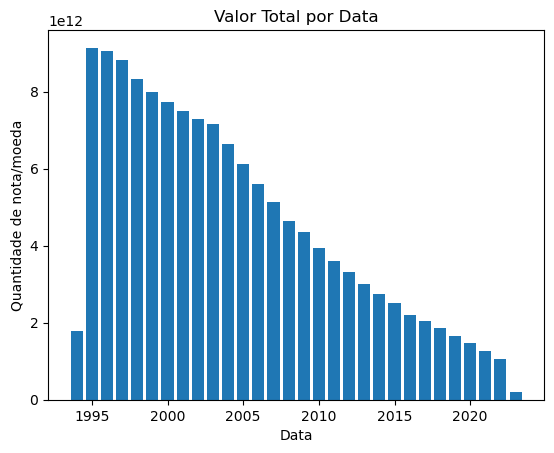

In [19]:
import matplotlib.pyplot as plt
import numpy as np

ano_unico = tabela_final["Ano"].unique()
soma_quantidade_por_ano = tabela_final.groupby('Ano')['Quantidade'].sum()

## Grafico de quantidade total de emissão por ano
x = ano_unico
y = soma_quantidade_por_ano

plt.xlabel('Data')
plt.ylabel('Quantidade de nota/moeda')
plt.title('Valor Total por Data')

plt.bar(x,y)
plt.show()

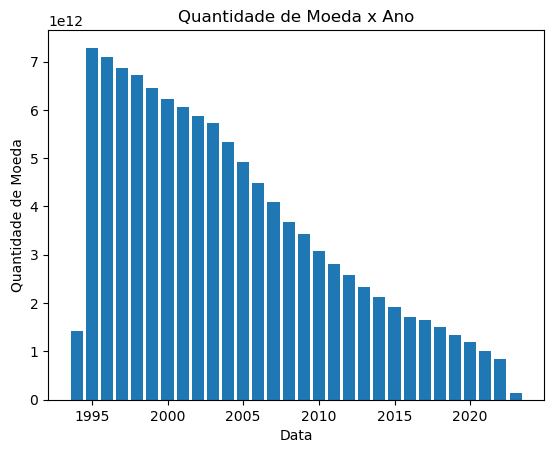

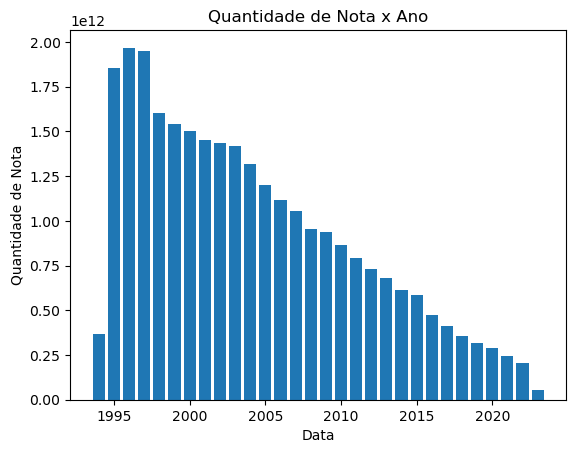

In [57]:
## Plot de 2 gráficos: Qtidade de nota x Ano e Qtidade de moeda x Ano

import matplotlib.pyplot as plt
import numpy as np

ano_unico = tabela_final["Ano"].unique()
soma_quantidade_por_ano_moeda = tabela_final[tabela_final['Especie'] == 'Moedas'].groupby(['Ano', 'Especie'])['Quantidade'].sum()
soma_quantidade_por_ano_nota = tabela_final[tabela_final['Especie'] == 'Cédulas'].groupby(['Ano', 'Especie'])['Quantidade'].sum()

## Grafico de quantidade total de emissão por ano
x = ano_unico
y = soma_quantidade_por_ano_moeda
z = soma_quantidade_por_ano_nota

plt.xlabel('Data')
plt.ylabel('Quantidade de Moeda')
plt.title('Quantidade de Moeda x Ano')

plt.bar(x,y)
plt.show()

plt.xlabel('Data')
plt.ylabel('Quantidade de Nota')
plt.title('Quantidade de Nota x Ano')
plt.bar(x,z)
plt.show()





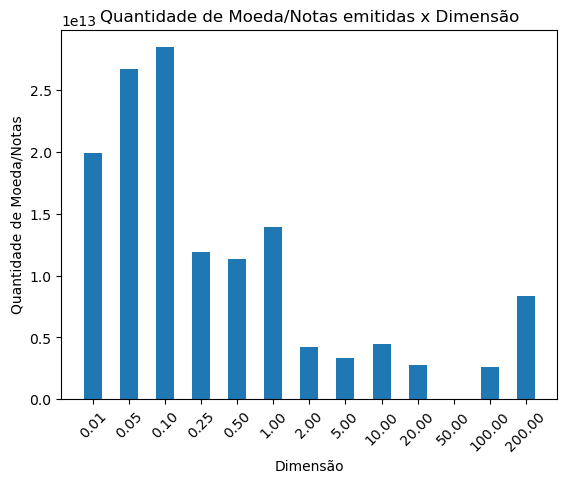

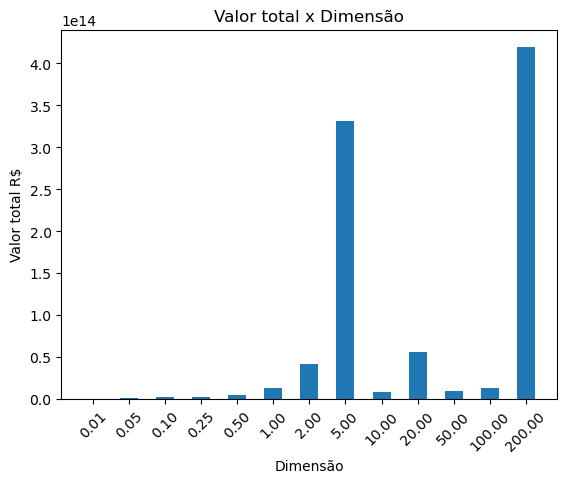

In [91]:
## Vizualização das informações por dimensão
import matplotlib.pyplot as plt
import numpy as np

tipo_moeda = tabela_final["Denominacao"].unique()

moedas = tabela_final.groupby(['Denominacao'])['Quantidade'].sum()
valor_total = tabela_final.groupby(['Denominacao'])['Valor'].sum()

x = tipo_moeda
y = moedas
z = valor_total

plt.xlabel('Dimensão')
plt.ylabel('Quantidade de Moeda/Notas')
plt.title('Quantidade de Moeda/Notas emitidas x Dimensão')

plt.bar(x, y, width=0.5)
plt.xticks(rotation=45)
plt.show()

plt.xlabel('Dimensão')
plt.ylabel('Valor total R$')
plt.title('Valor total x Dimensão')

plt.bar(x, z, width=0.5)
plt.xticks(rotation=45)
plt.show()